In [1]:
%load_ext autoreload
%autoreload 2

In [39]:
import numpy as np 

from sympy.printing import print_latex
from sympy import symbols, Derivative, lambdify, sqrt, series

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from matplotlib import gridspec
%matplotlib notebook

from acchamiltoniansandmatrices.Utils.JupyterHelpFunctions import hide_toggle
from acchamiltoniansandmatrices.Hamiltonians.HarmonicOscillator import (
    PotentialSymb1DHarmonicOscillator, 
    HamSymb1DHarmonicOscillator,
    Potentialnp1DHarmonicOscillator,
    Hamnp1DHarmonicOscillator
)

In [14]:
x, p, omega, k,m  = symbols("x p_x omega k m")

# Hamiltonian Dynamics

* Introduction
* Examples:
    * Harmonic Oscillator

# Introduction

Hamiltonians can be used to study dynamical systems and their behaviour. Given an Hamiltonian $H$ the corresponding equations of motion, in symbolic form, are given by:
$$ \dot{x} = \frac{\partial H}{\partial p}  \\
 \dot{p} = -\frac{\partial H}{\partial x} $$.
 
Another way to look at the Hamiltonian as the expression for an algebraic submanifold in the manifold of phase-space coordinates. All particle motion has to be confined to this submanifold. In other words, fixing the value of the Hamiltonian and some initial phase-space coordinates will determine the allowed trajectories as the Hamiltonian value has to stay fixed. We will demonstrate this with some examples below.

# Example: Harmonic Oscillator

As an example of the previously discussed topics we consider first the Harmonic Oscillator, as it is one of the few examples that can be solved exactly both classically and quantum mechanically.

## Problem statement

Consider a particle of mass $m$ under the influence of a linear restoring force $$F=-kx.$$ Then the resulting potential is given by:
$$V(x) =\frac{m \omega^{2} x^{2}}{2}$$
with $$\omega = \sqrt{\frac{k}{m}}$$
Using the expression $H = T + V$ we can now write the Hamiltonian for the Harmonic Oscillator:
$$H = \frac{p^2}{2m} +\frac{m \omega^{2} x^{2}}{2}$$

In [16]:
hide_toggle(for_next=True)

<IPython.core.display.Javascript object>


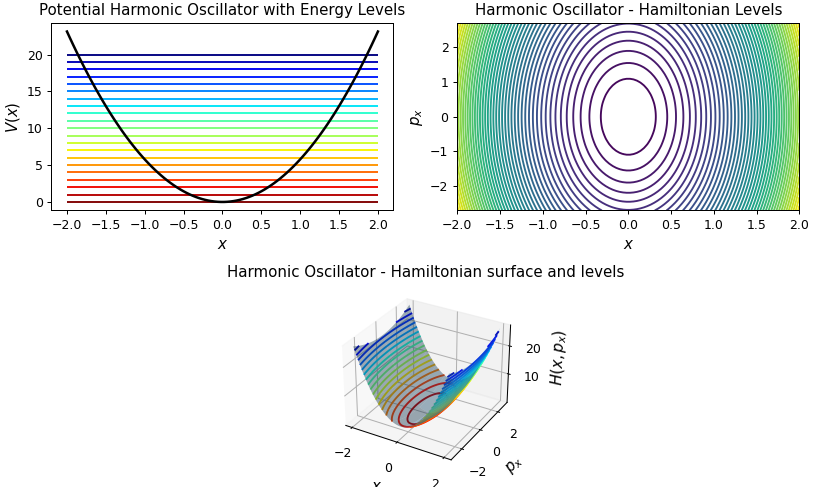

Text(0.5, 0.92, 'Harmonic Oscillator - Hamiltonian surface and levels')

In [26]:
# set some parameters
mass = 1
om = 3.4

xval = 2.0
pval = 0.9
npoints =100
mg = 50

X = np.linspace(-xval, xval, npoints)
P = np.linspace(-pval, pval, npoints)

n=21 #number of energy levels to show +1 

color=cm.jet(np.linspace(1,0,n))

# subplot grid
fig = plt.figure(constrained_layout=True, figsize = (10,6))
gs  = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,:], projection = "3d")

ax1.plot(X, Potentialnp1DHarmonicOscillator(X,mass,om),linewidth=2,c="black")
ax1.hlines(range(n),-2,2,colors=color)
ax1.set_xlabel(r"$x$",fontsize =12);
ax1.set_ylabel(r"$V(x)$",fontsize=12);
ax1.set_title("Potential Harmonic Oscillator with Energy Levels");

X = np.linspace(-xval, xval, npoints)
P = np.linspace(-3*pval, 3*pval, npoints)
Xg, Pg = np.meshgrid(X, P)
H = Hamnp1DHarmonicOscillator(Xg,Pg,mass,om)
ax2.contour(Xg, Pg, H, mg)
ax2.set_xlabel(r"$x$",fontsize =12);
ax2.set_ylabel(r"$p_x$",fontsize=12);
ax2.set_title("Harmonic Oscillator - Hamiltonian Levels");


ax3.plot_surface(Xg, Pg, H,alpha=0.4,rstride=mg)
ax3 = fig.gca(projection='3d')
cset = ax3.contour(X, P, H,levels=20,cmap=cm.jet_r)
ax3.clabel(cset, fontsize=9, inline=1)
ax3.set_xlabel(r"$x$",fontsize =12);
ax3.set_ylabel(r"$p_x$",fontsize=12);
ax3.set_zlabel(r"$H(x,p_x)$",fontsize=12);
ax3.set_title("Harmonic Oscillator - Hamiltonian surface and levels")

#  Example: Mixed Term

In this example we replace the Harmonic Oscillator by a slightly different one:
$$H = x^2 + \frac{xp}{\sqrt{p_{x}^{2} + 1}} +0.01p^2$$
The square root make this a highly non-linear expresson, so let us simplify it by expanding it up to second order:
$$H = x^2 +  xp\left(1 + O\left(p_{x}^{2}\right)\right)+0.01p^2.$$ 
Removing the $O$:
$$H = x^2 +  xp+0.01p^2.$$ 

**Higher order expansion:**
$$\frac{1}{\sqrt{p_{x}^{2} + 1}} = 1 - \frac{p_{x}^{2}}{2} + \frac{3 p_{x}^{4}}{8} - \frac{5 p_{x}^{6}}{16} + \frac{35 p_{x}^{8}}{128} - \frac{63 p_{x}^{10}}{256} + O\left(p_{x}^{12}\right)$$

In [139]:
def f(x,p):
    s = series(1/sqrt(1+p**2),x,0,2).removeO()
    return x**2 + x * p * s +0.01*p**2

sf = lambdify((x,p),f(x,p),"numpy")

In [143]:
hide_toggle(for_next=True)

<IPython.core.display.Javascript object>


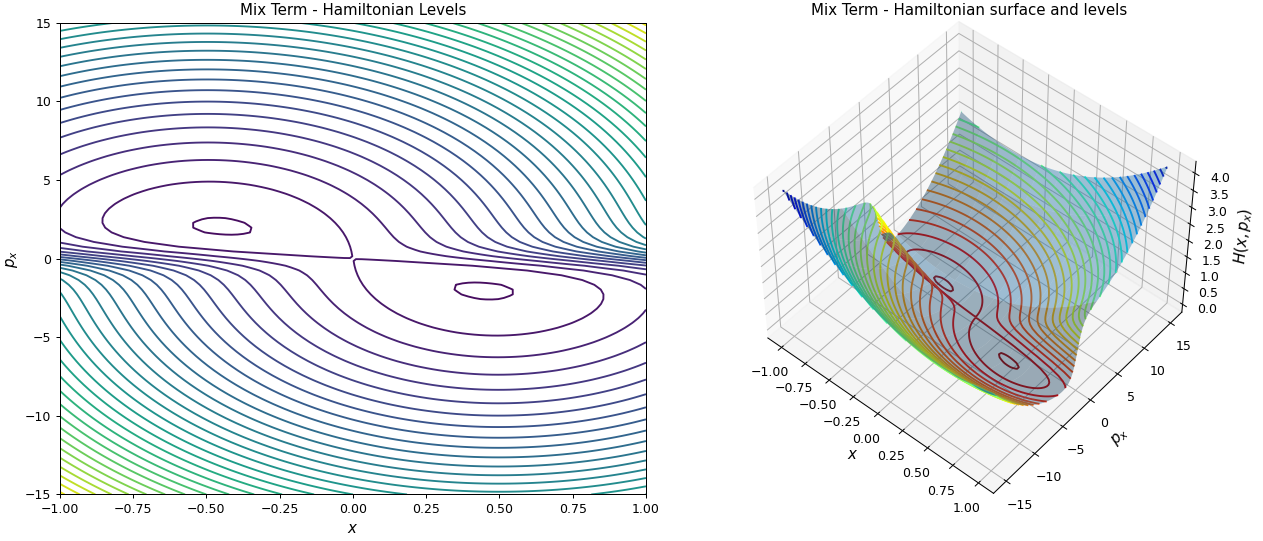

In [145]:

xval = 1.0
pval = 3
npoints =100
mg = 30

X = np.linspace(-xval, xval, npoints)
P = np.linspace(-pval, pval, npoints)

# subplot grid
fig = plt.figure(constrained_layout=True, figsize = (14,6))
gs  = fig.add_gridspec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1], projection = "3d")

X = np.linspace(-xval, xval, npoints)
P = np.linspace(-5*pval, 5*pval, npoints)
Xg, Pg = np.meshgrid(X, P)
H = sf(Xg,Pg)
ax1.contour(Xg, Pg, H, mg)
ax1.set_xlabel(r"$x$",fontsize =12);
ax1.set_ylabel(r"$p_x$",fontsize=12);
ax1.set_title("Mix Term - Hamiltonian Levels");


ax2.plot_surface(Xg, Pg, H,alpha=0.4,rstride=mg)
ax2 = fig.gca(projection='3d')
cset = ax2.contour(X, P, H,levels=mg,cmap=cm.jet_r)
ax2.clabel(cset, fontsize=9, inline=1)
ax2.set_xlabel(r"$x$",fontsize =12);
ax2.set_ylabel(r"$p_x$",fontsize=12);
ax2.set_zlabel(r"$H(x,p_x)$",fontsize=12);
ax2.set_title("Mix Term - Hamiltonian surface and levels");